In [12]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [14]:
df.shape

(51717, 17)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [16]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


Text(0.5, 0, 'Number of outlets')

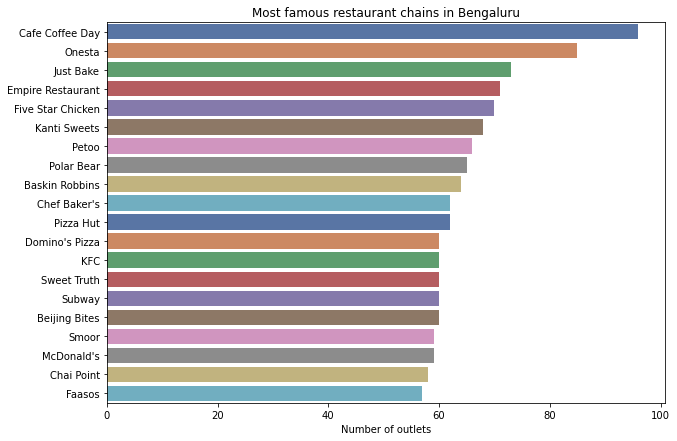

In [47]:
# Top 20 restaurants with largest number of outlets
plt.figure(figsize = (10,7))
chains = df.name.value_counts()[:20]
sns.barplot(x=chains, y = chains.index, palette = 'deep')
plt.title('Most famous restaurant chains in Bengaluru')
plt.xlabel('Number of outlets')

#### Cafe coffee day has the most number of outlets in Bangalore.

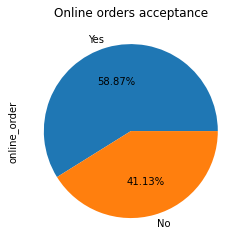

In [21]:
# Online orders acceptance rate
df['online_order'].value_counts(normalize =True).plot.pie(autopct = "%0.2f%%")
plt.title('Online orders acceptance')
plt.legend
plt.show()

#### Close to 60% of the restaurants in Bangalore accept online orders and around 40% do not accept online orders. 

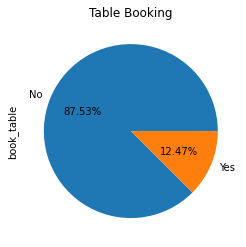

In [22]:
# Table booking facility
df['book_table'].value_counts(normalize =True).plot.pie(autopct = "%0.2f%%")
plt.title('Table Booking')
plt.legend
plt.show()

#### Around 90% of the restaurants do not provide table booking. 

<AxesSubplot:xlabel='rate', ylabel='Density'>

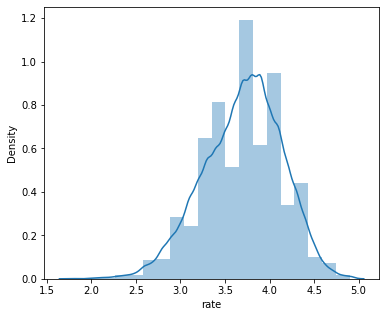

In [25]:
# Distribution of rating
plt.figure(figsize=(6,5))
rating=df['rate'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>3)  else np.nan ).dropna()
sns.distplot(rating,bins=20)

#### Almost 50% of the restaurants have rating between 3 and 4. Restaurants with higher rating (>=4.5) are very few.

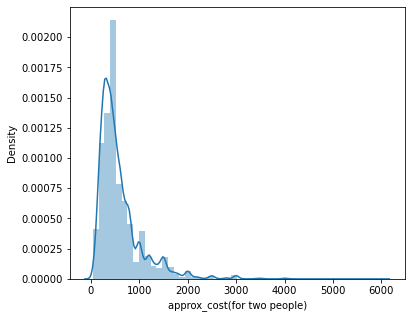

In [44]:
# Cost Distribution
plt.figure(figsize=(6,5))
sns.distplot(cost_dist['approx_cost(for two people)'])
plt.show()

#### The distribution is left skewed and shows that majority of the restaurants serve food for less than Rs 1000 for two people.

Text(0.5, 0, 'Number of restaurants')

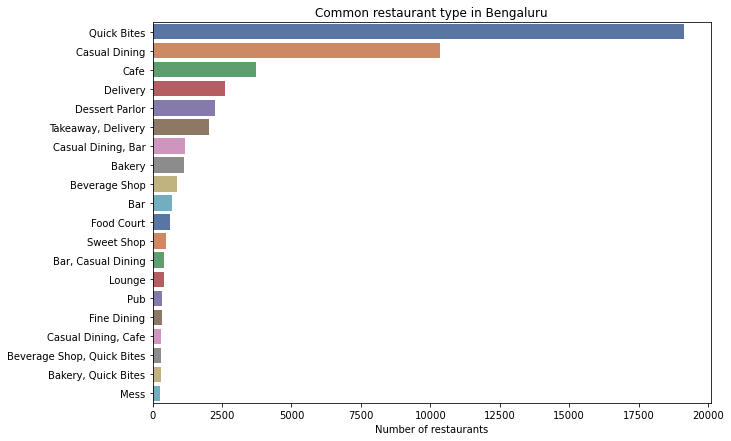

In [49]:
# Most common type of restaurant in Bangalore
plt.figure(figsize = (10,7))
chains = df['rest_type'].value_counts()[:20]
sns.barplot(x=chains, y = chains.index, palette = 'deep')
plt.title('Common restaurant type in Bengaluru')
plt.xlabel('Number of restaurants')

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

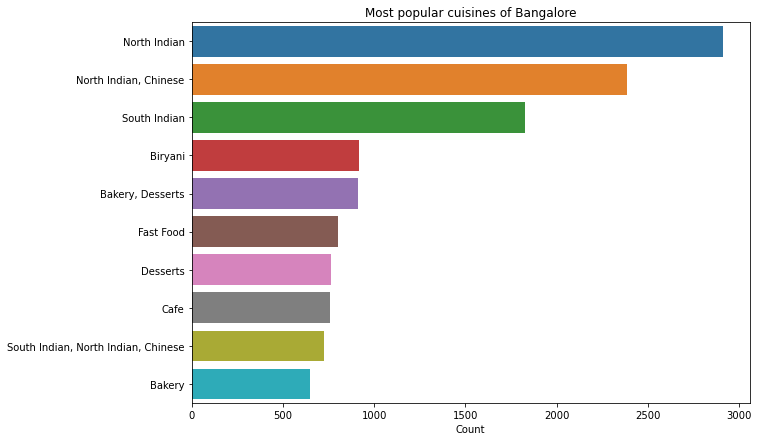

In [56]:
# Most common cuisines in Bangalore
plt.figure(figsize=(10,7))
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

#### Consumers in Bangalore prefer quick bites since Bangaloreans are mostly techies and have busy and fast-paced life style.

Text(0.5, 0, 'Number of restaurants')

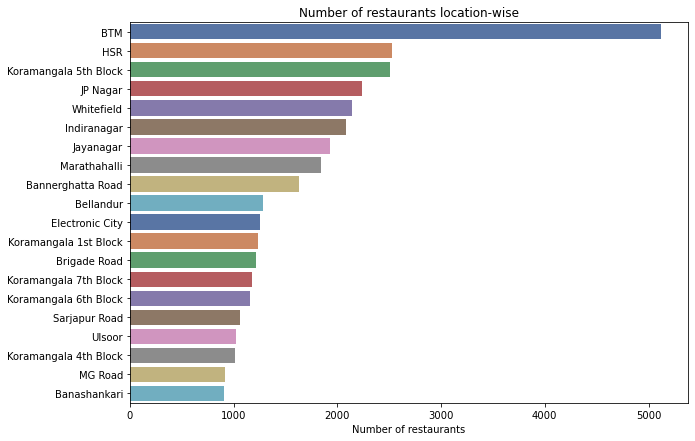

In [54]:
# Foodie areas
plt.figure(figsize=(10,7))
Rest_locations=df['location'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="deep")
plt.title('Number of restaurants location-wise')
plt.xlabel('Number of restaurants')

In [55]:
# Common cuisines in each location
df_1=df.groupby(['location','cuisines']).agg('count')
data=df_1.sort_values(['url'],ascending=False).groupby(['location'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})
data.head(10)

,level_0,location,cuisines,count
0,0,BTM,"North Indian, Chinese",379
1,0,BTM,North Indian,340
2,0,BTM,Biryani,120
3,1,Banashankari,South Indian,86
4,1,Banashankari,"North Indian, Chinese",61
5,1,Banashankari,North Indian,36
6,2,Banaswadi,South Indian,37
7,2,Banaswadi,"North Indian, Chinese",24
8,2,Banaswadi,Biryani,23
9,3,Bannerghatta Road,"North Indian, Chinese",130


In [57]:
# Best budget restaurants in any location in Bangalore
cost_dist=df[['rate','approx_cost(for two people)','location','name','rest_type']].dropna()
cost_dist['rate']=cost_dist['rate'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)
cost_dist['approx_cost(for two people)']=cost_dist['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))

In [58]:
def return_budget(location,rest):
    budget=cost_dist[(cost_dist['approx_cost(for two people)']<=400) & (cost_dist['location']==location) & 
                     (cost_dist['rate']>4) & (cost_dist['rest_type']==rest)]
    return(budget['name'].unique())

In [59]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)